In [1]:
from numpy.fft import fft, fftshift
import numpy as np
import matplotlib.pyplot as plt

In [14]:
def sinc(x,w, N):
    y1 = 2 * np.pi * x * (w + 0.5)
    y1 /= N
    y2 = np.pi * x
    y2 /= N
    out = np.where(x  == 0, 2 * w + 1, np.sin(y1)/np.sin(y2))
    return out

In [15]:
def hann(x, w, N):
    shift =-N//(2 * w)
    return 0.5 *  sinc(x, w, N)+ 0.25 * sinc(x-shift, w, N) + 0.25 * sinc(x+shift, w, N)

In [11]:
path = "code/images"

N=60, w=10, shift=-3


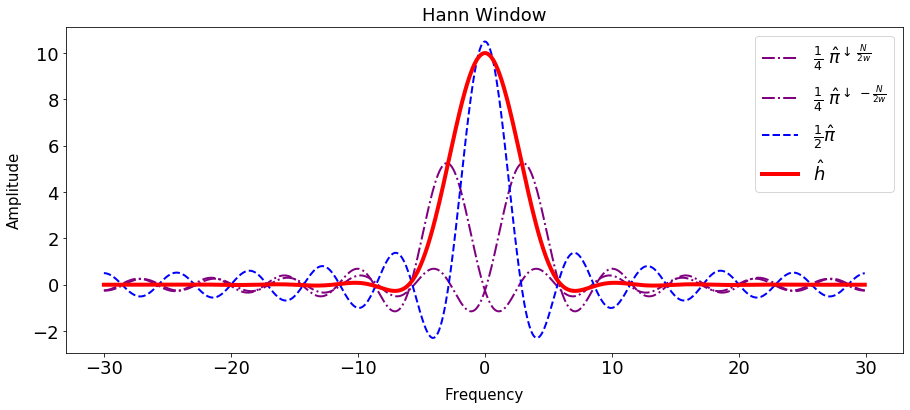

In [12]:
plt.figure(figsize=(15, 6))
#plt.figure(figsize=(9, 6))
N = 60
x =  np.arange(-N//2, N//2, 0.1)
w =  10
shift = -N//(2 * w)
print(f"N={N}, w={w}, shift={shift}")
component1 = 0.25 * sinc(x+shift, w, N)
component2 = 0.25 * sinc(x-shift, w, N)
#component2 = 0.25 * sinc(x-shift, w, N)
component3 = 0.5 *  sinc(x, w, N)
hann = component1 + component2 + component3
plt.plot(x, component1, "purple", linewidth=2, linestyle='-.', label=r"$\frac{1}{4} \; \hat{\pi}^{\downarrow \, \frac{N}{2w}}$")
plt.plot(x, component2, "purple", linewidth=2, linestyle='-.', label=r"$\frac{1}{4} \; \hat{\pi}^{\downarrow \, -\frac{N}{2w}}$")
plt.plot(x, component3, "blue", linewidth=2, linestyle='--', label=r"$\frac{1}{2}\hat{\pi}$")
plt.plot(x, hann, "red",  linewidth=4, label=r"$\hat{h}$")
plt.title("Hann Window", fontsize=18)
plt.ylabel("Amplitude", fontsize=15, labelpad=10)
plt.xlabel("Frequency", fontsize=15, labelpad=10)
plt.legend(fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.savefig(path + '/Hann.pdf', bbox_inches='tight')
plt.show()
plt.close()

In [77]:
def hann_window(N,w):
    hann = np.zeros(N)
    hann[:(w+1)] = 0.5 *(1 + np.cos(np.pi*np.arange(w+1)/w))
    hann[-w:] = 0.5 *(1 + np.cos(np.pi*np.arange(-w,0,1)/w))
    return hann

In [79]:
plt.close('all')
N = 400
w = 40
rect = np.zeros(N)
rect[:(w+1)] = 1
rect[-w:] = 1
rect_dft = np.sin( 2* np.pi * np.arange(N) * (w+0.5)/N) / np.sin( np.pi * np.arange(N) / N)
rect_dft[0] = 2*w + 1
rect_dft_num = np.fft.fft(rect)

/Users/yg/anaconda3/envs/mathds/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


In [80]:
hann_dft_num = np.fft.fft(hann)
hann_dft_aux1 = 0.5 * rect_dft
shift = int(N/w/2)
hann_dft_aux2 = 0.25 * np.roll(rect_dft,shift)
hann_dft_aux3 = 0.25 * np.roll(rect_dft,-shift)
hann_dft = hann_dft_aux1 + hann_dft_aux2 + hann_dft_aux3

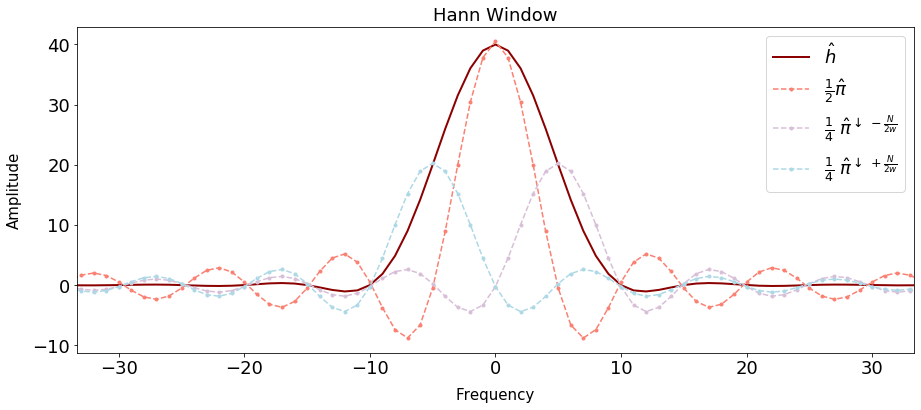

In [89]:
plt.figure(figsize=(15, 6))
plt.plot(indices,np.fft.fftshift(np.real(hann_dft_num)),lw=2,color='darkred', label=r"$\hat{h}$")
plt.plot(indices,np.fft.fftshift(np.real(hann_dft_aux1)),'--.',color='salmon', label=r"$\frac{1}{2}\hat{\pi}$")
plt.plot(indices,np.fft.fftshift(np.real(hann_dft_aux2)),'--.',color='thistle', label=r"$\frac{1}{4} \; \hat{\pi}^{\downarrow \, -\frac{N}{2w}}$")
plt.plot(indices,np.fft.fftshift(np.real(hann_dft_aux3)),'--.',color='lightblue',label=r"$\frac{1}{4} \; \hat{\pi}^{\downarrow \, +\frac{N}{2w}}$")
plt.tick_params(labelsize=12)
plt.xlim((-lim_aux/3,lim_aux/3))
plt.title("Hann Window", fontsize=18)
plt.ylabel("Amplitude", fontsize=15, labelpad=10)
plt.xlabel("Frequency", fontsize=15, labelpad=10)
plt.legend(fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.savefig(path + '/Hann.pdf', bbox_inches='tight')
plt.show()
plt.close()